In [1]:
import pandas as pd
import numpy as np

path_1 = r'/Users/tom/Documents/Coding/AiCore/Projects/4. Football Match Outcome Predictor /Cleaned Datasets/ML_split/classification_premiership_decade_3_dataset.csv'
path_2 = r'/Users/tom/Documents/Coding/AiCore/Projects/4. Football Match Outcome Predictor /Cleaned Datasets/ML_split/classification_primera_division_decade_3_dataset.csv'

#populated_premiership_decade_3_ml_df.to_csv(path_1, index=False)
#populated_primera_division_decade_3_ml_df.to_csv(path_2, index=False)

clean_epl_d3_df = pd.read_csv(path_1)
clean_spd_d3_df = pd.read_csv(path_2)


Standardise the data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# TODONE: Split into targets and features
# TODONE: Normalise the data
# TODO: Attempt at first with a logistic regression model
# TODO: Find out how to check if models are over fitting
# #TODO: POtentially change the win streak for running total not season by season

X = clean_epl_d3_df.drop(columns="Home_Result", axis=1)
y = (clean_epl_d3_df["Home_Result"])

# Saving feature names for later use
feature_columns = (X.columns)
# Convert to numpy array
#features = np.array(features)

# Encode the labels of the targets

import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit the encoder to the targets column
le.fit(y)
#list the classes of the targets
list(le.classes_)
# transform the targets column (inverse_transform to change it back!)
y_encoded = le.transform(y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.3)

min_max_scaler = MinMaxScaler()

# Features normalised by the MinMax approach

X_train_minmax = min_max_scaler.fit_transform(X_train)

# This same instance is then applied to the test data

X_test_minmax = min_max_scaler.transform(X_test)

# Create the validation set

X_test, X_validation, y_test, y_validation = train_test_split(
    X_test_minmax, y_test, test_size=0.3
)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")

win_count = len((clean_epl_d3_df.loc[(clean_epl_d3_df["Home_Result"] == "win")]))
loss_count = len((clean_epl_d3_df.loc[(clean_epl_d3_df["Home_Result"] == "loss")]))
draw_count = len((clean_epl_d3_df.loc[(clean_epl_d3_df["Home_Result"] == "draw")]))
total = win_count + loss_count + draw_count

print(f"Count of wins in data: {win_count} (% {win_count/total * 100})")
print(f"Count of losses in data: {loss_count} (% {loss_count/total * 100})")
print(f"Count of draws in data: {draw_count} (% {draw_count/total * 100})")



Number of samples in:
    Training: 2870
    Validation: 370
    Testing: 861
Count of wins in data: 1850 (% 45.110948549134356)
Count of losses in data: 1248 (% 30.431602048280908)
Count of draws in data: 1003 (% 24.457449402584736)


In [150]:
X_train_minmax

array([[0.14285714, 0.35714286, 0.32380952, ..., 0.39867841, 0.29785479,
        0.43187176],
       [0.11904762, 0.5       , 0.0952381 , ..., 0.39090909, 0.31632653,
        0.36851312],
       [0.57142857, 0.47619048, 0.3047619 , ..., 0.37226277, 0.28714286,
        0.40489796],
       ...,
       [0.45238095, 0.9047619 , 0.22857143, ..., 0.33421053, 0.50584795,
        0.27067669],
       [0.5952381 , 0.19047619, 0.24761905, ..., 0.32397959, 0.25      ,
        0.48051948],
       [0.5       , 0.9047619 , 0.03809524, ..., 0.33846154, 0.51937269,
        0.27517132]])

In [147]:
clean_epl_d3_df

,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_goals_conceeded_so_far,home_team_current_win_streak,home_team_current_loss_streak,home_team_total_points_so_far,home_team_current_goal_drought,home_team_total_wins_so_far,away_team_total_goals_scored_so_far,...,away_team_current_win_streak,away_team_current_loss_streak,away_team_total_points_so_far,away_team_current_goal_drought,away_team_total_wins_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game,Home_Result
0,93.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.605263,0.921053,2.184211,1.078947,draw
1,97.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.263158,0.736842,0.000000,0.000000,win
2,86.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.763158,1.078947,1.921053,1.184211,draw
3,84.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.368421,1.026316,1.236842,1.736842,win
4,96.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.710526,0.842105,0.000000,0.000000,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,78.0,84.0,48.0,37.0,1.0,0.0,52.0,0.0,15.0,53.0,...,0.0,1.0,56.0,1.0,17.0,1.287805,1.521951,1.507752,1.306202,win
4097,71.0,80.0,33.0,38.0,0.0,1.0,32.0,0.0,7.0,41.0,...,0.0,0.0,47.0,0.0,14.0,0.979167,1.430556,1.407159,1.252796,draw
4098,94.0,75.0,51.0,36.0,1.0,0.0,49.0,0.0,14.0,42.0,...,1.0,0.0,44.0,0.0,13.0,1.877232,1.073661,1.093093,1.537538,win
4099,74.0,91.0,32.0,48.0,0.0,0.0,38.0,0.0,10.0,46.0,...,0.0,1.0,51.0,0.0,14.0,1.108108,1.415541,1.875000,1.017857,loss


Simple Logisitic regression model 

In [4]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logistic_regression_model.fit(X_train_minmax, y_train)
y_pred = logistic_regression_model.predict(X_test)


Classification Evaluation

The accuracy is 0.5005807200929152
True Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix:
The Bias is [-0.0190487   0.09503575 -0.07598705]


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_goals_conceeded_so_far,home_team_current_win_streak,home_team_current_loss_streak,home_team_total_points_so_far,home_team_current_goal_drought,home_team_total_wins_so_far,away_team_total_goals_scored_so_far,away_team_total_goals_conceeded_so_far,away_team_current_win_streak,away_team_current_loss_streak,away_team_total_points_so_far,away_team_current_goal_drought,away_team_total_wins_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game
draw,-0.000513,0.259159,-0.663818,0.067829,-0.552093,-0.002385,0.392636,-0.053411,0.251560,-0.257342,-0.052337,-0.078322,-0.065773,0.00380,-0.408658,-0.124123,-0.028949,-0.105376,-0.292699,-0.148715
loss,-0.775829,0.644815,-0.275242,0.591284,0.029818,-0.231076,-0.470888,0.099825,-0.267924,0.402200,-0.160973,0.650537,-0.142930,-0.17856,0.238187,0.066543,-0.844262,0.434374,1.052946,-0.428382
win,0.776342,-0.903975,0.939060,-0.659113,0.522275,0.233460,0.078252,-0.046414,0.016364,-0.144858,0.213310,-0.572215,0.208702,0.17476,0.170471,0.057580,0.873210,-0.328998,-0.760247,0.577097


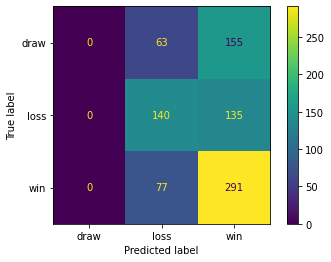

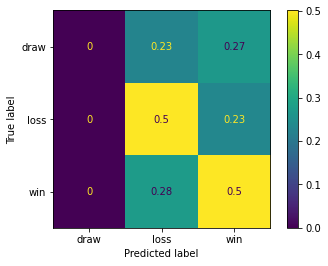

In [5]:
from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {logistic_regression_model.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(logistic_regression_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(logistic_regression_model, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])


# Get the model weights and Bias:

print(f"The Bias is {logistic_regression_model.intercept_}")

weights_df =  pd.DataFrame((logistic_regression_model.coef_), index = ["draw", "loss", "win"], columns = feature_columns)

display(weights_df)

Try with a Support Vector Machine model

1. Linear
2. RBF

https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

https://scikit-learn.org/stable/modules/svm.html

Pros and Cons associated with SVM
Pros:
It works really well with a clear margin of separation
It is effective in high dimensional spaces.
It is effective in cases where the number of dimensions is greater than the number of samples.
It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Cons:
It doesn’t perform well when we have large data set because the required training time is higher
It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

In [7]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_minmax, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  


The accuracy is 0.5075493612078978
True Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


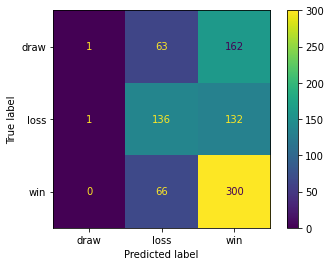

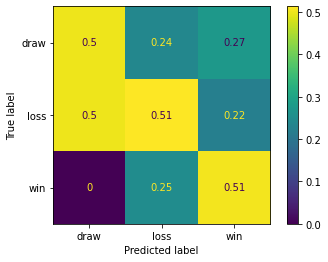

In [8]:
from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {svm_model_linear.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(svm_model_linear, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(svm_model_linear, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])

In [9]:
# Get the model weights and Bias:

print(f"The Bias is {svm_model_linear.intercept_}")

weights_df =  pd.DataFrame((svm_model_linear.coef_), index = ["draw", "loss", "win"], columns = feature_columns)

display(weights_df)

The Bias is [ 0.6606333  -0.9998524  -1.17466396]


,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_goals_conceeded_so_far,home_team_current_win_streak,home_team_current_loss_streak,home_team_total_points_so_far,home_team_current_goal_drought,home_team_total_wins_so_far,away_team_total_goals_scored_so_far,away_team_total_goals_conceeded_so_far,away_team_current_win_streak,away_team_current_loss_streak,away_team_total_points_so_far,away_team_current_goal_drought,away_team_total_wins_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game
draw,1.390949,-0.816935,-0.431629,-0.591067,-0.795576,0.321677,0.580437,-0.476465,0.413093,-0.185852,-0.302307,-0.141652,0.836119,0.201774,-0.666667,-0.045598,1.118177,-1.051521,-2.715873,-0.604891
loss,-0.000153,0.000219,0.000013,-0.000694,0.000145,0.000334,-0.005555,-0.000187,0.004358,-0.000481,0.000755,0.000471,0.000274,0.003538,0.000296,-0.002163,0.000086,-0.000285,0.000072,-0.000244
win,-1.186140,1.701581,-1.256748,0.977042,-0.501856,-0.244737,-0.292127,-0.196175,0.471868,0.487676,-0.476774,0.667597,-0.896838,-0.536514,0.640503,0.110908,-1.090599,0.822192,2.799276,-0.367996


Naive Bayes Theorem

What are the Pros and Cons of Naive Bayes?
Pros:

It is easy and fast to predict class of test data set. It also perform well in multi class prediction
When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).
Cons:

If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

In [145]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_minmax, y_train)  

GaussianNB()

The accuracy is 0.49709639953542395
True Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


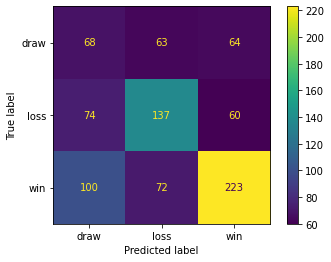

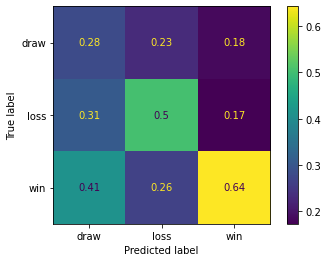

In [146]:
from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {gnb.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(gnb, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(gnb, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])


Try with a classification tree

## Classification tree limitations
- very prone to overfitting - no generalisation between similar examples
- every midpoint between every consecutive example has to be considered as a position to split the data every time we grow the tree. Larger dataset = longer time to fit.
- the candidate positions to split the data must be considered along each feature axis

>3, train: 0.534, test: 0.531
>4, train: 0.541, test: 0.531
>5, train: 0.541, test: 0.524
>6, train: 0.541, test: 0.525
>7, train: 0.541, test: 0.525
>8, train: 0.541, test: 0.525
>9, train: 0.541, test: 0.525
>10, train: 0.541, test: 0.525
>11, train: 0.541, test: 0.525
>12, train: 0.541, test: 0.525
>13, train: 0.541, test: 0.525
>14, train: 0.541, test: 0.525
>15, train: 0.541, test: 0.525
>16, train: 0.541, test: 0.525
>17, train: 0.541, test: 0.525
>18, train: 0.541, test: 0.525
>19, train: 0.541, test: 0.525
>20, train: 0.541, test: 0.525
>21, train: 0.541, test: 0.525
>22, train: 0.541, test: 0.525
>23, train: 0.541, test: 0.525
>24, train: 0.541, test: 0.525


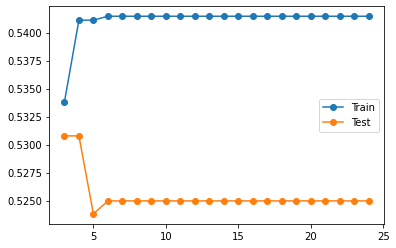

In [141]:
# check for over fitting
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the alplha values to evaluate
values = list(range(3,25,1))
values_list = []
for value in values:
    values_list.append(value)
# evaluate a decision tree for each depth
for i in values_list:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=16)
	# fit model on the training dataset
	model.fit(X_train_minmax, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_minmax)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [142]:
from sklearn.tree import DecisionTreeClassifier

classificationTree = DecisionTreeClassifier(max_depth=24, max_leaf_nodes=16)

classificationTree.fit(X_train_minmax, y_train)

DecisionTreeClassifier(max_depth=24, max_leaf_nodes=16)

When the parameters of a ML model are varied and the accuracy on the training data continues to increase while the test decreases this is a classic example of a model being overfitted to the training data

The accuracy is 0.5249709639953543
True Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


['0.0 : away_team_current_goal_drought',
 '0.0 : away_team_current_loss_streak',
 '0.0 : away_team_current_win_streak',
 '0.0 : away_team_total_goals_conceeded_so_far',
 '0.0 : away_team_total_points_so_far',
 '0.0 : away_team_total_wins_so_far',
 '0.0 : home_team_current_goal_drought',
 '0.0 : home_team_current_loss_streak',
 '0.0 : home_team_current_win_streak',
 '0.0 : home_team_total_goals_conceeded_so_far',
 '0.0 : home_team_total_points_so_far',
 '0.01865318588689344 : home_team_total_goals_scored_so_far',
 '0.018684831068549172 : home_team_total_wins_so_far',
 '0.019127022761681826 : away_team_total_goals_scored_so_far',
 '0.030876757983204096 : home_team_average_goals_scored_per_game',
 '0.042399635179832 : away_team_average_goals_conceeded_per_game',
 '0.04344165148951091 : home_team_average_goals_conceeded_per_game',
 '0.05229169780377495 : ELO_away',
 '0.3635428337689352 : away_team_average_goals_scored_per_game',
 '0.4109823840576184 : ELO_home']

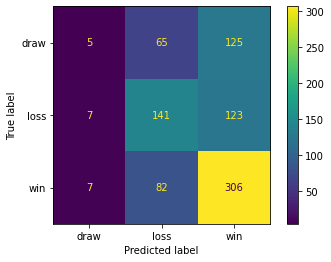

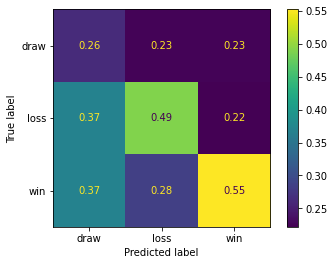

In [143]:
from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {classificationTree.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(classificationTree, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(classificationTree, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])

x = list(classificationTree.feature_importances_)
y = (list(feature_columns))

weights = []
for item in x:
    weights.append(str(item))

weights_list = []
for weight, column in zip(weights,y):
    z = weight + " : " + column
    weights_list.append(z)

(weights_list).sort()
weights_list


The accuracy is 0.5423925667828107
True Confusion Matrix:
Normalized Confusion Matrix:
The Bias is [-0.24283236 -0.13588635  0.37871872]


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_goals_conceeded_so_far,home_team_current_win_streak,home_team_current_loss_streak,home_team_total_points_so_far,home_team_current_goal_drought,home_team_total_wins_so_far,away_team_total_goals_scored_so_far,away_team_total_goals_conceeded_so_far,away_team_current_win_streak,away_team_current_loss_streak,away_team_total_points_so_far,away_team_current_goal_drought,away_team_total_wins_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game
draw,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152212,0.000000,0.000000,0.000000,-0.030571,0.0,-0.004574,-0.102854,0.000000,1.024290,0.000000,0.0
loss,-1.259514,0.412664,0.000000,0.000000,0.000000,-0.160097,-0.397403,0.000000,0.000000,0.738787,-0.265543,0.485737,0.000000,0.0,0.000000,0.000000,-0.220786,0.000000,2.454575,0.0
win,0.785608,-1.318524,1.726529,-0.625105,0.132517,0.000000,0.000000,0.066449,0.000000,0.000000,0.000000,0.000000,0.278990,0.0,0.000000,0.000000,0.585098,-0.005601,0.000000,0.0


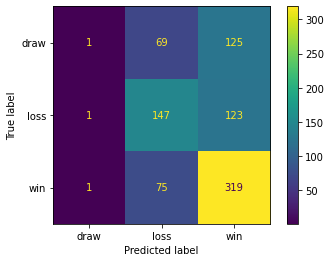

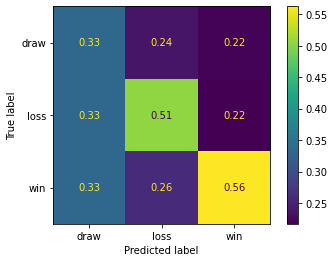

In [152]:
from sklearn.linear_model import LogisticRegression

logistic_regression_saga_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty ='l1')
logistic_regression_saga_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {logistic_regression_saga_model.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(logistic_regression_saga_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(logistic_regression_saga_model, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])


# Get the model weights and Bias:

print(f"The Bias is {logistic_regression_saga_model.intercept_}")

weights_df =  pd.DataFrame((logistic_regression_saga_model.coef_), index = ["draw", "loss", "win"], columns = feature_columns)

display(weights_df)


SGD Classifier evaluation

>1, train: 0.523, test: 0.551
>2, train: 0.529, test: 0.530
>3, train: 0.494, test: 0.487
>4, train: 0.528, test: 0.544
>5, train: 0.521, test: 0.519
>6, train: 0.495, test: 0.508
>7, train: 0.525, test: 0.546
>8, train: 0.528, test: 0.537
>9, train: 0.527, test: 0.542
>10, train: 0.485, test: 0.488
>11, train: 0.530, test: 0.532
>12, train: 0.517, test: 0.525
>13, train: 0.527, test: 0.544
>14, train: 0.533, test: 0.537
>15, train: 0.525, test: 0.547
>16, train: 0.529, test: 0.548
>17, train: 0.527, test: 0.539
>18, train: 0.497, test: 0.492
>19, train: 0.527, test: 0.534
>20, train: 0.524, test: 0.528
>21, train: 0.529, test: 0.532
>22, train: 0.529, test: 0.545
>23, train: 0.527, test: 0.545
>24, train: 0.492, test: 0.468
>25, train: 0.525, test: 0.519
>26, train: 0.520, test: 0.544
>27, train: 0.525, test: 0.527
>28, train: 0.525, test: 0.540
>29, train: 0.532, test: 0.539
>30, train: 0.529, test: 0.540
>31, train: 0.527, test: 0.539
>32, train: 0.521, test: 0.508
>33, train: 0.527

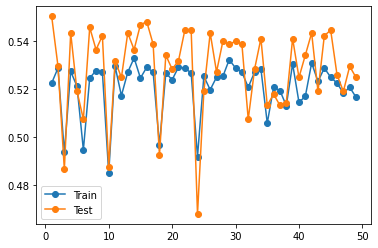

In [153]:
# check for over fitting

from sklearn.linear_model import SGDClassifier


from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the alplha values to evaluate
values = list(range(1,50,1))
values_list = []
for value in values:
    values_list.append(value)
# evaluate a decision tree for each depth
for i in values_list:
	# configure the model
	model = SGDClassifier(max_iter=700, loss='log_loss',  penalty ='l1',  early_stopping=False, random_state=i)
	# fit model on the training dataset
	model.fit(X_train_minmax, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_minmax)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

The accuracy is 0.5435540069686411
True Confusion Matrix:
Normalized Confusion Matrix:
The Bias is [-1.63461405 -0.89287136  0.07838054]


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_goals_conceeded_so_far,home_team_current_win_streak,home_team_current_loss_streak,home_team_total_points_so_far,home_team_current_goal_drought,home_team_total_wins_so_far,away_team_total_goals_scored_so_far,away_team_total_goals_conceeded_so_far,away_team_current_win_streak,away_team_current_loss_streak,away_team_total_points_so_far,away_team_current_goal_drought,away_team_total_wins_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game
draw,0.000000,0.540280,-2.225820,0.844042,-0.208029,0.000000,0.572272,-0.144503,0.707211,-0.329510,0.000000,-0.280839,-0.463050,0.000000,-0.105359,-0.54602,-0.420244,1.775960,-1.223288,0.126289
loss,-1.775011,1.033731,-1.119515,0.715293,-0.504213,-0.333051,-1.312033,0.000000,0.635042,1.006914,-0.250069,0.739657,0.000000,0.000000,0.125471,0.00000,-0.779950,-0.398391,2.705275,0.000000
win,1.138478,-1.729734,3.435261,-1.248255,0.485005,0.217098,0.321350,0.344190,-1.904262,-0.494173,0.570587,-0.708428,0.431749,0.426648,0.000000,0.00000,0.599151,-0.819214,-1.626611,0.000000


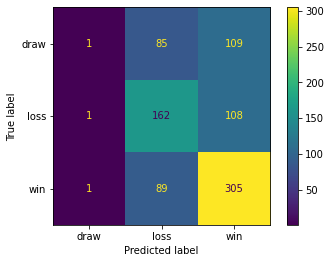

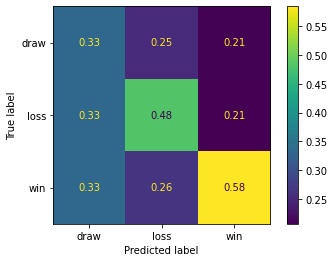

In [155]:
from sklearn.linear_model import SGDClassifier

sgd_classifier_model = SGDClassifier(max_iter=700, loss='log_loss',  penalty ='l1',  early_stopping=False, random_state=13)
sgd_classifier_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {sgd_classifier_model.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(sgd_classifier_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(sgd_classifier_model, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])


# Get the model weights and Bias:

print(f"The Bias is {sgd_classifier_model.intercept_}")

weights_df =  pd.DataFrame((sgd_classifier_model.coef_), index = ["draw", "loss", "win"], columns = feature_columns)

display(weights_df)

Does this model are overfit?

>1, train: 1.000, test: 0.402
>2, train: 0.697, test: 0.375
>3, train: 0.671, test: 0.451
>4, train: 0.637, test: 0.445
>5, train: 0.610, test: 0.458
>6, train: 0.600, test: 0.490
>7, train: 0.598, test: 0.495
>8, train: 0.583, test: 0.487
>9, train: 0.575, test: 0.484
>10, train: 0.569, test: 0.485
>11, train: 0.566, test: 0.492
>12, train: 0.560, test: 0.503
>13, train: 0.550, test: 0.491
>14, train: 0.554, test: 0.497
>15, train: 0.549, test: 0.497
>16, train: 0.550, test: 0.512
>17, train: 0.543, test: 0.508
>18, train: 0.542, test: 0.511
>19, train: 0.537, test: 0.504
>20, train: 0.534, test: 0.508
>21, train: 0.540, test: 0.504
>22, train: 0.547, test: 0.509
>23, train: 0.542, test: 0.513
>24, train: 0.538, test: 0.517
>25, train: 0.536, test: 0.508
>26, train: 0.536, test: 0.499
>27, train: 0.536, test: 0.503
>28, train: 0.539, test: 0.511
>29, train: 0.538, test: 0.506
>30, train: 0.539, test: 0.512
>31, train: 0.539, test: 0.513
>32, train: 0.534, test: 0.506
>33, train: 0.536

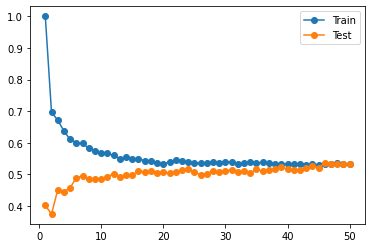

In [156]:

from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the alplha values to evaluate
values = list(range(1,51,1))
values_list = []
for value in values:
    values_list.append(value)
# evaluate a decision tree for each depth
for i in values_list:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train_minmax, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_minmax)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

The accuracy is 0.5249709639953543
True Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


The number of features seen during the fit is 20


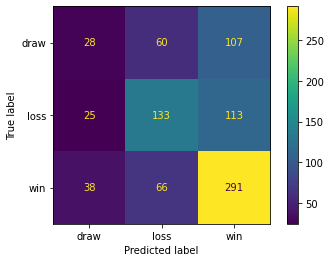

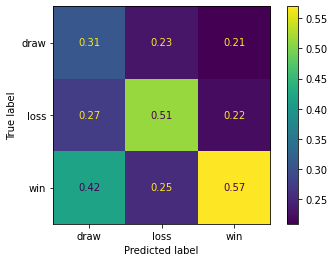

In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=39)
knn_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {knn_model.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(knn_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(knn_model, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])


# Get the model weights and Bias:

print(f"The number of features seen during the fit is {knn_model.n_features_in_}")

In [162]:
print(f"The number of features seen during the fit is {knn_model.n_samples_fit_}")


The number of features seen during the fit is 2870


Try this with a Random Forest Classifier

>1, train: 0.514, test: 0.521
>2, train: 0.529, test: 0.539
>3, train: 0.529, test: 0.547
>4, train: 0.537, test: 0.549
>5, train: 0.547, test: 0.547
>6, train: 0.580, test: 0.541
>7, train: 0.627, test: 0.538
>8, train: 0.683, test: 0.542
>9, train: 0.756, test: 0.544
>10, train: 0.805, test: 0.544
>11, train: 0.882, test: 0.546
>12, train: 0.930, test: 0.534
>13, train: 0.975, test: 0.532
>14, train: 0.991, test: 0.521
>15, train: 0.997, test: 0.521
>16, train: 0.999, test: 0.525
>17, train: 1.000, test: 0.530
>18, train: 1.000, test: 0.515
>19, train: 1.000, test: 0.517
>20, train: 1.000, test: 0.534
>21, train: 1.000, test: 0.524
>22, train: 1.000, test: 0.527
>23, train: 1.000, test: 0.525
>24, train: 1.000, test: 0.513
>25, train: 1.000, test: 0.516
>26, train: 1.000, test: 0.519
>27, train: 1.000, test: 0.511
>28, train: 1.000, test: 0.515
>29, train: 1.000, test: 0.527


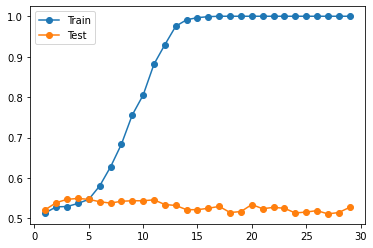

In [163]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the alplha values to evaluate
values = list(range(1,30,1))
values_list = []
for value in values:
    values_list.append(value)
# evaluate a decision tree for each depth
for i in values_list:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train_minmax, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_minmax)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

The accuracy is 0.5307781649245064
True Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


['0.010914921901228438 : away_team_current_goal_drought',
 '0.014676395276050434 : home_team_current_goal_drought',
 '0.017839924633730214 : away_team_current_loss_streak',
 '0.018268257237342825 : home_team_current_win_streak',
 '0.020958313918540653 : away_team_current_win_streak',
 '0.021920411443842807 : home_team_current_loss_streak',
 '0.03516426083938962 : away_team_total_wins_so_far',
 '0.03698821579101109 : home_team_total_wins_so_far',
 '0.04624394636430238 : home_team_total_goals_conceeded_so_far',
 '0.04653281731611994 : away_team_total_points_so_far',
 '0.04911033322228175 : home_team_total_points_so_far',
 '0.049908228753760005 : away_team_total_goals_scored_so_far',
 '0.054256659518978526 : home_team_total_goals_scored_so_far',
 '0.054459050731618476 : away_team_total_goals_conceeded_so_far',
 '0.0792498642292466 : away_team_average_goals_conceeded_per_game',
 '0.07986133496014503 : ELO_away',
 '0.07995374268372175 : ELO_home',
 '0.09250647672966864 : home_team_average_g

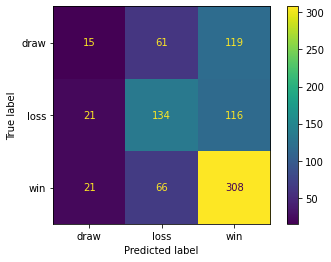

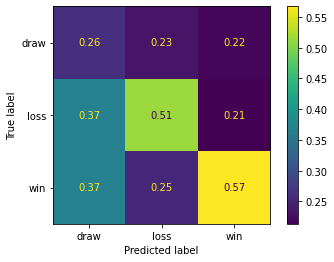

In [166]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(max_depth=11)
rfc_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {rfc_model.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(rfc_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(rfc_model, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])

x = list(rfc_model.feature_importances_)
y = (list(feature_columns))

weights = []
for item in x:
    weights.append(str(item))

weights_list = []
for weight, column in zip(weights,y):
    z = weight + " : " + column
    weights_list.append(z)

(weights_list).sort()
weights_list


## Feature Selection

From the analysis of the models and weights above, the features that are impacting the outcome the least are:

*"away_team_current_goal_drought",
*"home_team_current_goal_drought",
*"home_team_current_loss_streak",
*"away_team_current_loss_streak",
*"home_team_current_win_streak", 
*"away_team_current_win_streak", 
*"home_team_total_wins_so_far", 
*"away_team_total_wins_so_far", 
*"home_team_total_goals_conceeded_so_far",
*"away_team_total_goals_conceeded_so_far"

Therefore these are removed and the the models are retrained to assess the impact on accuracy and overfitting.

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# TODONE: Split into targets and features
# TODONE: Normalise the data
# TODONE: Attempt at first with a logistic regression model
# TODONE: Find out how to check if models are over fitting
#TODO: Remove more of these to see the impact on the models

X = clean_epl_d3_df.drop(columns=["Home_Result", "away_team_current_goal_drought",
"home_team_current_goal_drought",
"home_team_current_loss_streak",
"away_team_current_loss_streak",
"home_team_current_win_streak", 
"away_team_current_win_streak", 
"home_team_total_wins_so_far", 
"away_team_total_wins_so_far", 
"home_team_total_goals_conceeded_so_far",
"away_team_total_goals_conceeded_so_far"], axis=1)
y = (clean_epl_d3_df["Home_Result"])

# Saving feature names for later use
feature_columns = (X.columns)

# Encode the labels of the targets

le = LabelEncoder()
# Fit the encoder to the targets column
le.fit(y)
#list the classes of the targets
#list(le.classes_)
# transform the targets column (inverse_transform to change it back!)
y_encoded = le.transform(y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.3)

min_max_scaler = MinMaxScaler()

# Features normalised by the MinMax approach

X_train_minmax = min_max_scaler.fit_transform(X_train)

# This same instance is then applied to the test data

X_test_minmax = min_max_scaler.transform(X_test)

# Create the validation set

X_test, X_validation, y_test, y_validation = train_test_split(
    X_test_minmax, y_test, test_size=0.3
)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")

win_count = len((clean_epl_d3_df.loc[(clean_epl_d3_df["Home_Result"] == "win")]))
loss_count = len((clean_epl_d3_df.loc[(clean_epl_d3_df["Home_Result"] == "loss")]))
draw_count = len((clean_epl_d3_df.loc[(clean_epl_d3_df["Home_Result"] == "draw")]))
total = win_count + loss_count + draw_count

print(f"Count of wins in data: {win_count} (% {win_count/total * 100})")
print(f"Count of losses in data: {loss_count} (% {loss_count/total * 100})")
print(f"Count of draws in data: {draw_count} (% {draw_count/total * 100})")




Number of samples in:
    Training: 2870
    Validation: 370
    Testing: 861
Count of wins in data: 1850 (% 45.110948549134356)
Count of losses in data: 1248 (% 30.431602048280908)
Count of draws in data: 1003 (% 24.457449402584736)


In [34]:
list(le.classes_)


['draw', 'loss', 'win']

The most succesful models were Logisitic regression, KNN

Gaussian NB is out as it is aprobability of conintous values - which is not relevant here

Classification Trees were over fitted in the previous example, lets try that one again now...

The accuracy on the test data is 0.5400696864111498
The accuracy on the training data is 0.5310104529616725
Test Confusion Matrix:
Training Confusion Matrix:
The Bias is [ 0.03561597 -0.22445872  0.18884274]


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_points_so_far,away_team_total_goals_scored_so_far,away_team_total_points_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game
draw,-0.071954,0.051037,-0.402961,0.036997,-0.059400,0.046276,0.035177,0.365468,-0.431576,-0.362625
loss,-0.818995,0.750197,-0.453419,-0.473397,0.516073,0.180863,-0.780037,0.323582,1.160693,-0.102557
win,0.890949,-0.801234,0.856380,0.436400,-0.456673,-0.227139,0.744860,-0.689050,-0.729117,0.465183


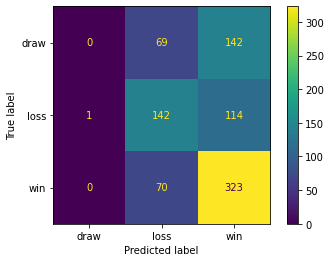

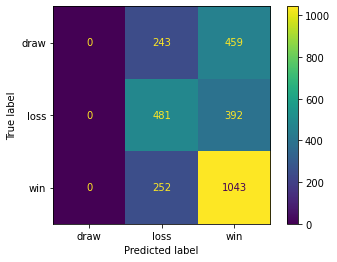

In [241]:
# Logisitic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logistic_regression_model.fit(X_train_minmax, y_train)
y_test_pred = logistic_regression_model.predict(X_test)
y_train_pred = logistic_regression_model.predict(X_train_minmax)

from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")


print("Test Confusion Matrix:")
plot_confusion_matrix(logistic_regression_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(logistic_regression_model, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])


# Get the model weights and Bias:

print(f"The Bias is {logistic_regression_model.intercept_}")

weights_df =  pd.DataFrame((logistic_regression_model.coef_), index = ["draw", "loss", "win"], columns = feature_columns)

display(weights_df)

Decision Tree Classified analysis on feature stripped data

>3, train: 0.534, test: 0.524
>5, train: 0.538, test: 0.521
>7, train: 0.538, test: 0.521
>9, train: 0.538, test: 0.521
>11, train: 0.538, test: 0.521
>13, train: 0.538, test: 0.521
>15, train: 0.538, test: 0.521
>17, train: 0.538, test: 0.521
>19, train: 0.538, test: 0.521
>21, train: 0.538, test: 0.521
>23, train: 0.538, test: 0.521
>25, train: 0.538, test: 0.521
>27, train: 0.538, test: 0.521
>29, train: 0.538, test: 0.521
>31, train: 0.538, test: 0.521
>33, train: 0.538, test: 0.521
>35, train: 0.538, test: 0.521
>37, train: 0.538, test: 0.521
>39, train: 0.538, test: 0.521
>41, train: 0.538, test: 0.521
>43, train: 0.538, test: 0.521
>45, train: 0.538, test: 0.521
>47, train: 0.538, test: 0.521
>49, train: 0.538, test: 0.521


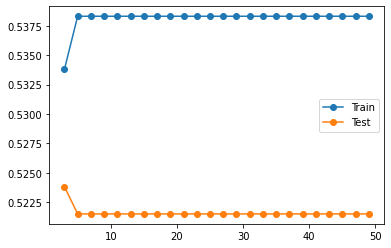

In [249]:
# check for over fitting

from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the alplha values to evaluate
values = list(range(3,50,2))
values_list = []
for value in values:
    values_list.append(value)
# evaluate a decision tree for each depth
for i in values_list:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=11)
	# fit model on the training dataset
	model.fit(X_train_minmax, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_minmax)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [250]:
from sklearn.tree import DecisionTreeClassifier

classificationTree = DecisionTreeClassifier(max_depth=15, max_leaf_nodes=200)

classificationTree.fit(X_train_minmax, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=200)

The accuracy on the test data is 0.47619047619047616
The accuracy on the training data is 0.7087108013937282
The accuracy on the validation data is 0.4783783783783784
Number of features in model: 10
Test Confusion Matrix:
Normalized Confusion Matrix:
Training Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class metho

['0.03227708845538825 : away_team_total_goals_scored_so_far',
 '0.04683662580846102 : home_team_total_points_so_far',
 '0.06498852196014666 : away_team_total_points_so_far',
 '0.07495715575167175 : home_team_total_goals_scored_so_far',
 '0.08242316798387174 : away_team_average_goals_conceeded_per_game',
 '0.09212821840374467 : home_team_average_goals_conceeded_per_game',
 '0.0989788210511148 : away_team_average_goals_scored_per_game',
 '0.15060966525983757 : ELO_away',
 '0.16177479795243205 : home_team_average_goals_scored_per_game',
 '0.19502593737333165 : ELO_home']

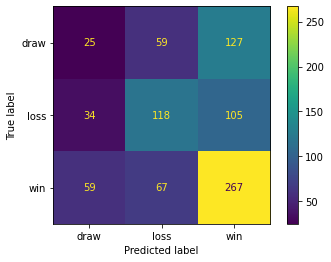

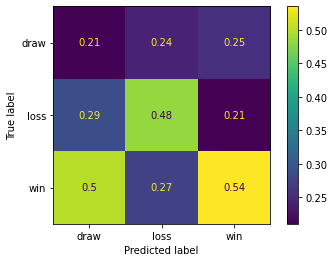

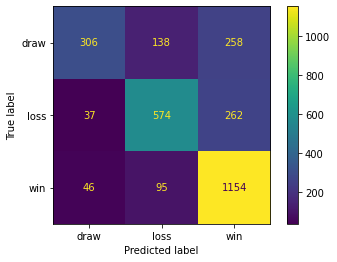

In [251]:
from sklearn.metrics import plot_confusion_matrix

y_test_pred = classificationTree.predict(X_test)
y_train_pred = classificationTree.predict(X_train_minmax)
y_valid_pred = classificationTree.predict(X_validation)



print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")
print(f"The accuracy on the validation data is {accuracy_score(y_validation, y_valid_pred, normalize=True)}")

print(f"Number of features in model: {classificationTree.n_features_in_}")


print("Test Confusion Matrix:")
plot_confusion_matrix(classificationTree, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(classificationTree, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(classificationTree, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])

x = list(classificationTree.feature_importances_)
y = (list(feature_columns))

weights = []
for item in x:
    weights.append(str(item))

weights_list = []
for weight, column in zip(weights,y):
    z = weight + " : " + column
    weights_list.append(z)

(weights_list).sort()
weights_list


The accuracy on the test data is 0.5400696864111498
The accuracy on the training data is 0.5285714285714286
The accuracy on the validation data is 0.4783783783783784
Test Confusion Matrix:
Training Confusion Matrix:
The Bias is [-0.01388275 -0.23452397  0.24840673]


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_points_so_far,away_team_total_goals_scored_so_far,away_team_total_points_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game
draw,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
loss,-0.762185,0.497342,0.000000,-0.370008,0.545748,0.000000,-0.841605,0.00000,1.998556,0.000000
win,1.057069,-1.101223,1.503468,0.140869,-0.426124,-0.191741,0.619736,-0.92727,0.000000,0.375888


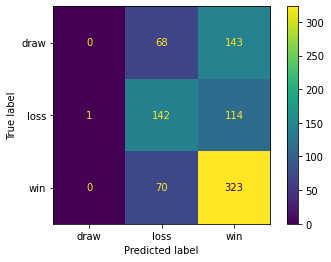

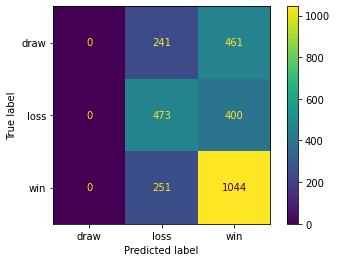

In [253]:
from sklearn.linear_model import LogisticRegression

logistic_regression_saga_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty ='l1')
logistic_regression_saga_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

y_test_pred = logistic_regression_saga_model.predict(X_test)
y_train_pred = logistic_regression_saga_model.predict(X_train_minmax)


print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")

y_valid_pred = classificationTree.predict(X_validation)

print(f"The accuracy on the validation data is {accuracy_score(y_validation, y_valid_pred, normalize=True)}")


print("Test Confusion Matrix:")
plot_confusion_matrix(logistic_regression_saga_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(logistic_regression_saga_model, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])


# Get the model weights and Bias:

print(f"The Bias is {logistic_regression_saga_model.intercept_}")

weights_df =  pd.DataFrame((logistic_regression_saga_model.coef_), index = ["draw", "loss", "win"], columns = feature_columns)

display(weights_df)

The accuracy on the validation data is 0.4783783783783784
The accuracy on the test data is 0.5110336817653891
Normalized Confusion Matrix:
The accuracy on the training data is 1.0
Test Confusion Matrix:
Training Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class metho

The number of features seen during the fit is 10


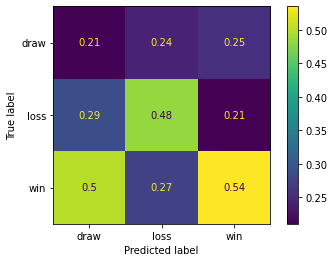

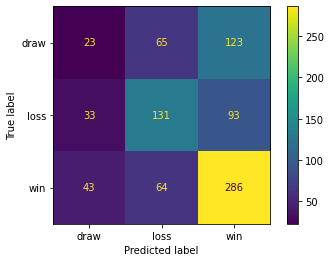

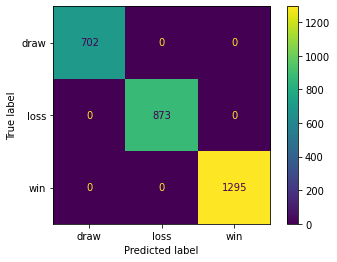

In [254]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=26, weights='distance')
knn_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

y_test_pred = knn_model.predict(X_test)
y_train_pred = knn_model.predict(X_train_minmax)

y_valid_pred = classificationTree.predict(X_validation)

print(f"The accuracy on the validation data is {accuracy_score(y_validation, y_valid_pred, normalize=True)}")


print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print("Normalized Confusion Matrix:")
plot_confusion_matrix(classificationTree, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")


print("Test Confusion Matrix:")
plot_confusion_matrix(knn_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(knn_model, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])



# Get the number of features:

print(f"The number of features seen during the fit is {knn_model.n_features_in_}")

>1, train: 0.677, test: 0.459
>11, train: 0.899, test: 0.496
>21, train: 0.939, test: 0.487
>31, train: 0.941, test: 0.496
>41, train: 0.956, test: 0.509
>51, train: 0.955, test: 0.503
>61, train: 0.953, test: 0.511
>71, train: 0.957, test: 0.516
>81, train: 0.959, test: 0.515
>91, train: 0.956, test: 0.501


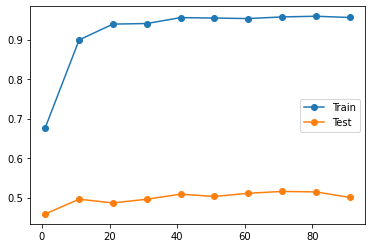

In [255]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the alplha values to evaluate
values = list(range(1,100,10))
values_list = []
for value in values:
    values_list.append(value)
# evaluate a decision tree for each depth
for i in values_list:
	# configure the model
	model = RandomForestClassifier(max_depth=13, n_estimators=i)
	# fit model on the training dataset
	model.fit(X_train_minmax, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_minmax)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

The accuracy on the test data is 0.5563298490127758
The accuracy on the training data is 0.6895470383275262
The accuracy on the validation data is 0.5243243243243243
Test Confusion Matrix:
Normalized Confusion Matrix:
Training Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class metho

['0.0612088140879585 : away_team_total_points_so_far',
 '0.06183749835070516 : home_team_total_goals_scored_so_far',
 '0.06876012717655748 : away_team_total_goals_scored_so_far',
 '0.07070697742898945 : home_team_total_points_so_far',
 '0.10293364697991696 : ELO_away',
 '0.10728044091812157 : away_team_average_goals_conceeded_per_game',
 '0.11966943380195894 : ELO_home',
 '0.1199487538697202 : home_team_average_goals_conceeded_per_game',
 '0.14368650078119893 : away_team_average_goals_scored_per_game',
 '0.14396780660487282 : home_team_average_goals_scored_per_game']

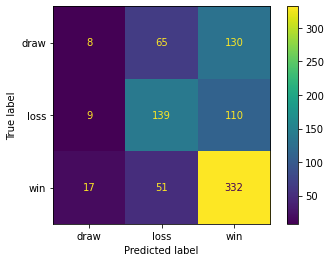

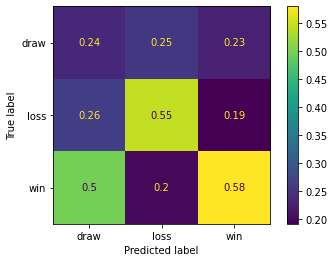

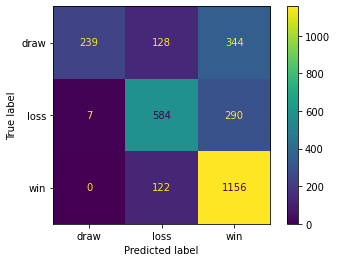

In [8]:
## Try for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
import sklearn.tree
from sklearn.metrics import accuracy_score

#from utils import visualise_predictions

rfc_model = RandomForestClassifier(n_estimators=100, max_depth=8)
rfc_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

y_test_pred = rfc_model.predict(X_test)
y_train_pred = rfc_model.predict(X_train_minmax)


print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")

y_valid_pred = rfc_model.predict(X_validation)

print(f"The accuracy on the validation data is {accuracy_score(y_validation, y_valid_pred, normalize=True)}")


print("Test Confusion Matrix:")
plot_confusion_matrix(rfc_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(rfc_model, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(rfc_model, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])

x = list(rfc_model.feature_importances_)
y = (list(feature_columns))

weights = []
for item in x:
    weights.append(str(item))

weights_list = []
for weight, column in zip(weights,y):
    z = weight + " : " + column
    weights_list.append(z)

(weights_list).sort()
weights_list


SGD Model

The accuracy is 0.519163763066202
True Confusion Matrix:
Normalized Confusion Matrix:
The Bias is [-0.7444306  -0.72391053 -0.59869399]


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,ELO_home,ELO_away,home_team_total_goals_scored_so_far,home_team_total_points_so_far,away_team_total_goals_scored_so_far,away_team_total_points_so_far,home_team_average_goals_scored_per_game,home_team_average_goals_conceeded_per_game,away_team_average_goals_scored_per_game,away_team_average_goals_conceeded_per_game
draw,-0.157899,0.094214,-1.131534,0.000000,0.000000,0.110849,-0.265056,0.771768,-0.985445,-0.467524
loss,-1.245799,1.066247,-0.784938,-0.825667,0.872493,0.036712,-1.373185,0.718409,2.123679,0.000000
win,1.514242,-1.229339,1.923789,0.340557,-1.104385,0.000000,1.207226,-1.357878,-1.376011,0.979369


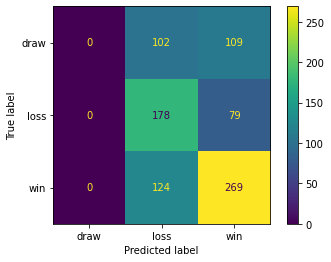

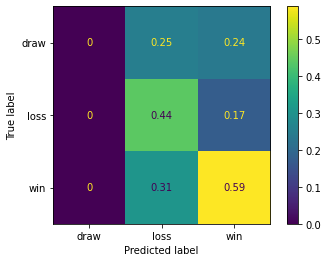

In [257]:
from sklearn.linear_model import SGDClassifier

sgd_classifier_model = SGDClassifier(max_iter=700, loss='log_loss',  penalty ='l1',  early_stopping=False, random_state=13)
sgd_classifier_model.fit(X_train_minmax, y_train)

from sklearn.metrics import plot_confusion_matrix

print(f"The accuracy is {sgd_classifier_model.score(X_test, y_test)}")

print("True Confusion Matrix:")
plot_confusion_matrix(sgd_classifier_model, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(sgd_classifier_model, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])


# Get the model weights and Bias:

print(f"The Bias is {sgd_classifier_model.intercept_}")

weights_df =  pd.DataFrame((sgd_classifier_model.coef_), index = ["draw", "loss", "win"], columns = feature_columns)

display(weights_df)

## Model Selection:

RFC and KNN have the highest accuracy and consistency across test, validation and training data.

Moving forwards with the RFC and KNN due, following feature selection, reduction in over-fitting and best accuracy across all three outcomes. 

Majority of other models struggled to make any prediticions based on draws.


### One Hot Encoding

Only to be used when categories need to be used as features. Ie pitch type (grass/astro/tarmac)

In this case you must one hot encode it, then drop one of the columns. The model will be able to infer the presence of the missing category from the scores. Ie 10[0] = grass, 00[1] = tarmac

### Google Collab

Google google collab to reduce personal computing power.

## Hyper Parameter tuning

Both the RFC and KN models have been tuned using a randomised search cv to find the most succesful parameters over a larger search area and then a grid search to identify the specific configuration of these parameters.




In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


knn_model = KNeighborsClassifier()

k_range = list(range(5, 200, 5))
weight_options = ['distance', 'uniform']
p_options = [1, 2]
# dictionary = dict(key=values, key=values)

knn_random_grid = {'n_neighbors': k_range,
               'weights': weight_options,
               'p': p_options}
print(knn_random_grid)




{'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195], 'weights': ['distance', 'uniform'], 'p': [1, 2]}


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn_model = KNeighborsClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random = RandomizedSearchCV(estimator = knn_model, param_distributions = knn_random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
knn_random.fit(X_train_minmax, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .............n_neighbors=125, p=1, weights=distance; total time=   0.2s
[CV] END .............n_neighbors=125, p=1, weights=distance; total time=   0.2s
[CV] END .............n_neighbors=125, p=1, weights=distance; total time=   0.2s
[CV] END ...............n_neighbors=90, p=1, weights=uniform; total time=   0.3s
[CV] END .............n_neighbors=105, p=2, weights=distance; total time=   0.2s
[CV] END ...............n_neighbors=90, p=1, weights=uniform; total time=   0.3s
[CV] END ...............n_neighbors=90, p=1, weights=uniform; total time=   0.3s
[CV] END .............n_neighbors=105, p=2, weights=distance; total time=   0.2s
[CV] END .............n_neighbors=105, p=2, weights=distance; total time=   0.2s
[CV] END .............n_neighbors=100, p=1, weights=distance; total time=   0.3s
[CV] END .............n_neighbors=100, p=1, weights=distance; total time=   0.2s
[CV] END .............n_neighbors=100, p=1, weig

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 10, 15, 20, 25, 30,
                                                        35, 40, 45, 50, 55, 60,
                                                        65, 70, 75, 80, 85, 90,
                                                        95, 100, 105, 110, 115,
                                                        120, 125, 130, 135, 140,
                                                        145, 150, ...],
                                        'p': [1, 2],
                                        'weights': ['distance', 'uniform']},
                   random_state=42, verbose=2)

In [20]:
knn_random.best_params_


{'weights': 'uniform', 'p': 2, 'n_neighbors': 175}

In [21]:
knn_base_model = KNeighborsClassifier(n_neighbors=26, weights='distance')
knn_base_model.fit(X_train_minmax, y_train)
base_accuracy = evaluate(knn_base_model, X_test, y_test)

knn_best_random = knn_random.best_estimator_
random_accuracy = evaluate(knn_best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( (random_accuracy - base_accuracy) / 1))

Model Performance
Accuracy = 0.54%.
Model Performance
Accuracy = 0.57%.
Improvement of 0.04%.


In [23]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
k_range = list(range(150, 200, 1))
weight_options = ['distance', 'uniform']
p_options = [1, 2]

knn_param_grid = {'n_neighbors': k_range,
               'weights': weight_options,
               'p': p_options}
'''
Randomised Search best parameters for Knn
{'weights': 'uniform', 'p': 2, 'n_neighbors': 175}
'''

 
# Create a based model
kn = KNeighborsClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = kn, param_grid = knn_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,  scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_minmax, y_train)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END .............n_neighbors=150, p=1, weights=distance; total time=   0.2s
[CV] END .............n_neighbors=150, p=1, weights=distance; total time=   0.2s
[CV] END .............n_neighbors=150, p=1, weights=distance; total time=   0.1s
[CV] END ..............n_neighbors=150, p=1, weights=uniform; total time=   0.2s
[CV] END .............n_neighbors=150, p=2, weights=distance; total time=   0.1s
[CV] END .............n_neighbors=150, p=2, weights=distance; total time=   0.1s
[CV] END ..............n_neighbors=150, p=1, weights=uniform; total time=   0.2s
[CV] END ..............n_neighbors=150, p=1, weights=uniform; total time=   0.2s
[CV] END .............n_neighbors=150, p=2, weights=distance; total time=   0.2s
[CV] END ..............n_neighbors=150, p=2, weights=uniform; total time=   0.2s
[CV] END ..............n_neighbors=150, p=2, weights=uniform; total time=   0.1s
[CV] END ..............n_neighbors=150, p=2, w

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [150, 151, 152, 153, 154, 155, 156, 157,
                                         158, 159, 160, 161, 162, 163, 164, 165,
                                         166, 167, 168, 169, 170, 171, 172, 173,
                                         174, 175, 176, 177, 178, 179, ...],
                         'p': [1, 2], 'weights': ['distance', 'uniform']},
             scoring='accuracy', verbose=2)

In [24]:
grid_search.best_params_


{'n_neighbors': 185, 'p': 1, 'weights': 'uniform'}

In [25]:
knn_best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(knn_best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( (grid_accuracy - base_accuracy) / 1))

Model Performance
Accuracy = 0.57%.
Improvement of 0.03%.


The accuracy on the test data is 0.5656213704994193
The accuracy on the training data is 0.524390243902439
The accuracy on the validation data is 0.5513513513513514
Test Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Training Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


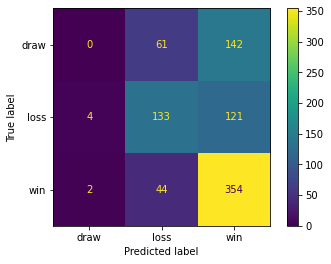

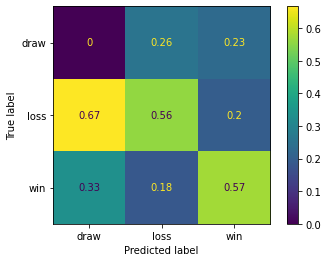

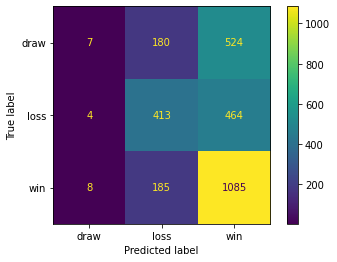

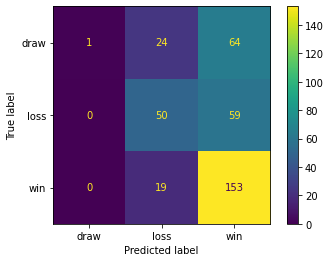

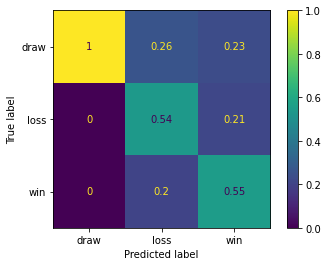

In [28]:
from sklearn.metrics import plot_confusion_matrix

y_test_pred = knn_best_grid.predict(X_test)
y_train_pred = knn_best_grid.predict(X_train_minmax)


print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")
y_valid_pred = knn_best_grid.predict(X_validation)

print(f"The accuracy on the validation data is {accuracy_score(y_validation, y_valid_pred, normalize=True)}")


print("Test Confusion Matrix:")
plot_confusion_matrix(knn_best_grid, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(knn_best_grid, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(knn_best_grid, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])

print("Test Confusion Matrix:")
plot_confusion_matrix(knn_best_grid, X_validation, y_validation, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(knn_best_grid, X_validation, y_validation, normalize='pred', display_labels=["draw", "loss", "win"])


# Tuning Random Forest Classifier

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)





{'n_estimators': [200, 1100, 2000], 'max_features': ['log2', 'sqrt', None], 'max_depth': [10, 60, 110, None], 'min_samples_split': [2, 7], 'min_samples_leaf': [1, 3], 'bootstrap': [True, False]}


In [10]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc_model_2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc_model_2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_minmax, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  13.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  19.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=  20.4s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 60, 110, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 3],
                                        'min_samples_split': [2, 7],
                                        'n_estimators': [200, 1100, 2000]},
                   random_state=42, verbose=2)

In [11]:
rf_random.best_params_
{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [12]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions, normalize=True)
 
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth=8)
base_model.fit(X_train_minmax, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( (random_accuracy - base_accuracy) / 1))


Model Performance
Accuracy = 0.55%.
Model Performance
Accuracy = 0.54%.
Improvement of -0.02%.


The accuracy on the test data is 0.5365853658536586
The accuracy on the training data is 0.759581881533101
Test Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Training Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


['0.06699627734061846 : away_team_total_points_so_far',
 '0.06969388889713275 : home_team_total_goals_scored_so_far',
 '0.07116024688451762 : home_team_total_points_so_far',
 '0.07329253008106722 : away_team_total_goals_scored_so_far',
 '0.09642169728764866 : ELO_away',
 '0.1094767904133576 : away_team_average_goals_conceeded_per_game',
 '0.113866713111318 : ELO_home',
 '0.1284658434534569 : home_team_average_goals_conceeded_per_game',
 '0.13032798060296744 : home_team_average_goals_scored_per_game',
 '0.14029803192791535 : away_team_average_goals_scored_per_game']

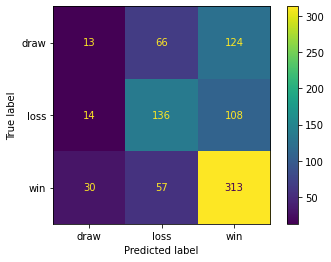

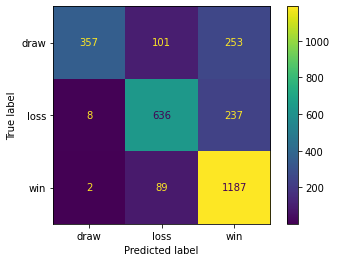

In [13]:
from sklearn.metrics import plot_confusion_matrix

y_test_pred = best_random.predict(X_test)
y_train_pred = best_random.predict(X_train_minmax)


print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")


print("Test Confusion Matrix:")
plot_confusion_matrix(best_random, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(best_random, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])

x = list(best_random.feature_importances_)
y = (list(feature_columns))

weights = []
for item in x:
    weights.append(str(item))

weights_list = []
for weight, column in zip(weights,y):
    z = weight + " : " + column
    weights_list.append(z)

(weights_list).sort()
weights_list


In [14]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 7, 10, 15, 20],
    'max_features':['log2','sqrt'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [5, 7, 9],
    'n_estimators': [100, 200, 300]
}
'''
Randomised Search parameters

{'n_estimators': 200,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

'''

 
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
rf_grid_search.fit(X_train_minmax, y_train)


Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 7, 10, 15, 20],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [15]:
rf_grid_search.best_params_


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 200}

In [16]:
rfc_best_grid = rf_grid_search.best_estimator_
grid_accuracy = evaluate(rfc_best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( (grid_accuracy - base_accuracy) / 1))


Model Performance
Accuracy = 0.56%.
Improvement of 0.00%.


The accuracy on the test data is 0.5574912891986062
The accuracy on the training data is 0.5515679442508711
The accuracy on the validation data is 0.5324324324324324
Test Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized Confusion Matrix:
Training Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Confusion Matrix:
Normalized Confusion Matrix:


/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


['0.032985776821773206 : away_team_total_points_so_far',
 '0.0379751572768262 : away_team_total_goals_scored_so_far',
 '0.03991469467314541 : home_team_total_points_so_far',
 '0.04051685602757043 : home_team_total_goals_scored_so_far',
 '0.10833514355210225 : away_team_average_goals_conceeded_per_game',
 '0.11632307629126895 : home_team_average_goals_conceeded_per_game',
 '0.12049302403911007 : ELO_away',
 '0.15605770713939743 : home_team_average_goals_scored_per_game',
 '0.1696054913786265 : away_team_average_goals_scored_per_game',
 '0.17779307280017964 : ELO_home']

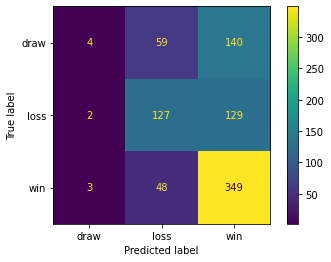

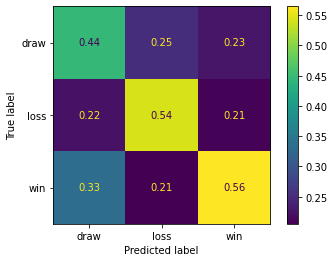

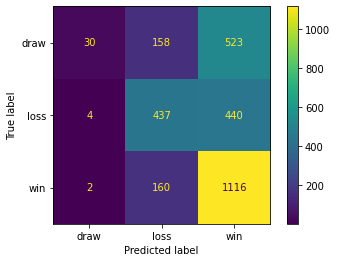

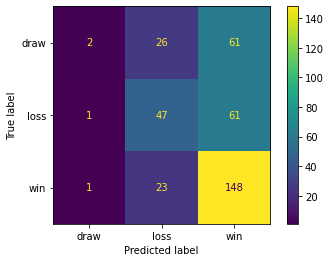

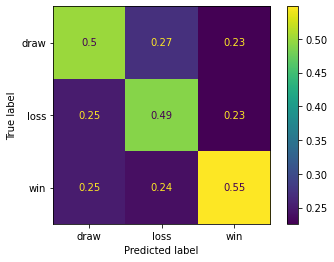

In [29]:
from sklearn.metrics import plot_confusion_matrix

y_test_pred = rfc_best_grid.predict(X_test)
y_train_pred = rfc_best_grid.predict(X_train_minmax)


print(f"The accuracy on the test data is {accuracy_score(y_test, y_test_pred, normalize=True)}")
print(f"The accuracy on the training data is {accuracy_score(y_train, y_train_pred, normalize=True)}")
y_valid_pred = rfc_best_grid.predict(X_validation)

print(f"The accuracy on the validation data is {accuracy_score(y_validation, y_valid_pred, normalize=True)}")


print("Test Confusion Matrix:")
plot_confusion_matrix(rfc_best_grid, X_test, y_test, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(rfc_best_grid, X_test, y_test, normalize='pred', display_labels=["draw", "loss", "win"])
print("Training Confusion Matrix:")
plot_confusion_matrix(rfc_best_grid, X_train_minmax, y_train, display_labels=["draw", "loss", "win"])

print("Test Confusion Matrix:")
plot_confusion_matrix(rfc_best_grid, X_validation, y_validation, display_labels=["draw", "loss", "win"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(rfc_best_grid, X_validation, y_validation, normalize='pred', display_labels=["draw", "loss", "win"])

x = list(rfc_best_grid.feature_importances_)
y = (list(feature_columns))

weights = []
for item in x:
    weights.append(str(item))

weights_list = []
for weight, column in zip(weights,y):
    z = weight + " : " + column
    weights_list.append(z)

(weights_list).sort()
weights_list


KNN and RFC are both accurate to > 53% across validation and test data. 



In [32]:
import joblib

joblib.dump(rfc_best_grid, "RandomForestClassifier.joblib")



['RandomForestClassifier.joblib']

In [33]:
joblib.dump(knn_best_grid, "KNeighbours.joblib")


['KNeighbours.joblib']